# Práctica 4: Procesamieto de audio

### **Participantes:**
- Gerardo León Quintana
- Susana Suárez Mendoza

## Ejercicio 1:

Construir un identificador de notas musicales. Es decir; en su versión más sencilla (y suficiente) la entrada es un sonido con una sola nota musical y debe identificar cuál es. Por simplicidad elija un único instrumento para la identificación. 

In [1]:
from identifiers.single_notes.identifier_factory import IdentifierFactory
from identifiers.chords.identifier_chords_factory import IdentifierChordsFactory
from identifiers.scales.scales_factory import ScalesIdentifierFactory
import warnings
import os
import pandas as pd

## 1.1 Identificación de una sola nota de los diversos instrumentos

Se ha llevado a cabo la identificación de las notas y sus correspondientes octavas en los instrumentos piano, guitarra, trompeta, violín y xilófono. Se cuenta con archivos de audio que contienen la reproducción de una sola nota para cada uno de los instrumentos mencionados. Además, se dispone de un conjunto de archivos con la mayoría de las notas disponibles, las cuales han sido debidamente etiquetadas para facilitar su análisis y clasificación.

In [2]:
def get_data(files, identifier, tolerance=5):
    resultados = []
    for file in os.listdir(files):
        if file.endswith(".wav"):
            file_path = os.path.join(files, file)
            class_name, result, frecuencia = identifier.identify_note_from_audio(file_path, tolerance)
            resultados.append({
                "Archivo": file,
                "Nota Identificada": class_name,
                "Octava": result,
                "Frecuencia": frecuencia
            })
    
    return pd.DataFrame(resultados)

In [3]:
warnings.filterwarnings("ignore")

piano_files = "./audios/piano/notas"
identifier = IdentifierFactory.initialize_identifier("Piano")

df_resultados = get_data(piano_files, identifier, tolerance=6)
display(df_resultados)

,Archivo,Nota Identificada,Octava,Frecuencia
0,do_piano.wav,Do,5,523.370840
1,do_reb.wav,DoSostenidoReb,5,558.260716
2,fa_piano.wav,Fa,4,348.570527
3,fa_solb.wav,FaSostenidoSolb,5,745.862282
4,la_piano.wav,La,4,439.079029
5,la_sib.wav,LaSostenidoSib,4,469.328486
6,mi_piano.wav,Mi,4,329.206744
7,re_mib.wav,ReSostenidoMib,5,627.069595
8,re_piano.wav,Re,4,291.513399
9,si_piano.wav,Si,4,494.372433


In [4]:
warnings.filterwarnings("ignore")

guitar_files = "./audios/guitarra/notas"
identifier = IdentifierFactory.initialize_identifier("Guitar")

df_resultados = get_data(guitar_files, identifier)
display(df_resultados)

,Archivo,Nota Identificada,Octava,Frecuencia
0,do_guitar.wav,Do,4,260.343943
1,do_sostenido.wav,DoSostenidoReb,3,139.152080
2,fa_guitar.wav,Fa,3,177.094082
3,fa_sostenido.wav,FaSostenidoSolb,3,183.364479
4,la_guitar.wav,La,3,219.947094
5,la_sostenido.wav,LaSostenidoSib,3,235.309330
6,mi_guitar.wav,Mi,3,162.584992
7,re_guitar.wav,Re,4,291.719891
8,re_sostenido.wav,ReSostenidoMib,4,314.449468
9,si_guitar.wav,Si,3,246.786632


In [5]:
warnings.filterwarnings("ignore")

trumpet_files = "./audios/trompeta/notas"
identifier = IdentifierFactory.initialize_identifier("Trumpet")

df_resultados = get_data(trumpet_files, identifier)

display(df_resultados)

,Archivo,Nota Identificada,Octava,Frecuencia
0,do_sostenido.wav,DoSostenidoReb,5,554.400000
1,do_trumpet.wav,Do,4,264.678030
2,fa.wav,Fa,4,351.883409
3,fa_sostenido.wav,FaSostenidoSolb,5,743.988507
4,la.wav,La,5,879.936414
5,la_sostenido.wav,LaSostenidoSib,4,466.431825
6,mi.wav,Mi,4,325.581973
7,re.wav,Re,5,589.677419
8,re_sostenido.wav,ReSostenidoMib,4,315.279472
9,si.wav,Si,5,988.209686


In [6]:
warnings.filterwarnings("ignore")

violin_files = "./audios/violin/notas"
identifier = IdentifierFactory.initialize_identifier("Violin")

df_resultados = get_data(violin_files, identifier)

display(df_resultados)

,Archivo,Nota Identificada,Octava,Frecuencia
0,do.wav,Do,5,521.282078
1,do_sostenido.wav,DoSostenidoReb,4,275.946028
2,fa.wav,Fa,4,351.966380
3,fa_sostenido.wav,FaSostenidoSolb,4,372.756363
4,la.wav,La,4,441.454014
5,la_sostenido.wav,LaSostenidoSib,3,232.939783
6,mi.wav,Mi,6,1318.807397
7,re.wav,Re,4,294.935302
8,re_sostenido.wav,ReSostenidoMib,5,623.614461
9,si.wav,Si,4,493.200000


In [7]:
warnings.filterwarnings("ignore")

xylophone_files = "./audios/xilofono/notas"
identifier = IdentifierFactory.initialize_identifier("Xylophone")

df_resultados = get_data(xylophone_files, identifier)

display(df_resultados)

,Archivo,Nota Identificada,Octava,Frecuencia
0,do.wav,Do,6,1050.666667
1,fa.wav,Fa,6,1398.933333
2,la.wav,La,6,1761.600000
3,mi.wav,Mi,6,1319.733333
4,re.wav,Re,6,1178.133333
5,si.wav,Si,6,1978.666667
6,sol.wav,Sol,6,1570.133333


### 1.1.1 Identificación de la nota de un solo archivo de audio

Si se requeriese, se puede identificar un solo archivo de audio mediante el siguiente código.

In [16]:
archivo_audio = "./audios/violin/notas/si.wav"

identifier = IdentifierFactory.initialize_identifier("Violin")
class_name, octava, dominant_freq = identifier.identify_note_from_audio(archivo_audio)

print(f"La nota identificada es {class_name} en la octava {octava} con una frecuencia dominante de {dominant_freq} Hz")

La nota identificada es Si en la octava 4 con una frecuencia dominante de 493.20000000000005 Hz


## 1.2. Identificación de acordes de los diversos instrumentos



In [9]:
import os
identifier = IdentifierChordsFactory.initialize_identifier("Piano")

lista_de_archivos = os.listdir("./audios/piano/acordes/")

for file in lista_de_archivos:
    archivo_audio = "./audios/piano/acordes/" + file
    #identifier.identify_chord_from_audio(archivo_audio)
    #print(file + " identificado")
    #print("")

In [10]:
archivo_audio = "./audios/guitarra/acordes/sol_mayor.wav"

identifier = IdentifierChordsFactory.initialize_identifier("Guitar")
result = identifier.identify_chord_from_audio(archivo_audio)
print(result)

Frecuencias dominantes: [np.float64(146.2047646248446), np.float64(123.0995822272997), np.float64(197.2995979077764)]
Acorde identificado de la guitarra: Sol Mayor compuesto por las notas Sol, Si, Re


In [11]:
archivo_audio = "./audios/violin/acordes/sol_mayor.wav"

identifier = IdentifierChordsFactory.initialize_identifier("Violin")
result = identifier.identify_chord_from_audio(archivo_audio)
print(result)

Frecuencias dominantes: [np.float64(293.641925036459), np.float64(390.9164946305801), np.float64(496.8275914316559)]
Acorde identificado de la guitarra: Sol Mayor compuesto por las notas Sol, Si, Re


In [12]:
archivo_audio = "./audios/trompeta/acordes/prueba2.wav"

identifier = IdentifierChordsFactory.initialize_identifier("Trumpet")
result = identifier.identify_chord_from_audio(archivo_audio)
print(result)

Frecuencias dominantes: [np.float64(389.1780748279817), np.float64(437.18328913417434), np.float64(489.7322068520643)]
Acorde aproximado: Mi Menor (Em) compuesto por las notas Mi, Sol, Si (coinciden: Sol, Si)
Acorde aproximado: Sol Mayor compuesto por las notas Sol, Si, Re (coinciden: Sol, Si)


In [13]:
archivo_audio = "./audios/xilofono/acordes/prueba.wav"

identifier = IdentifierChordsFactory.initialize_identifier("Xylophone")
result = identifier.identify_chord_from_audio(archivo_audio)
print(result)

Frecuencias dominantes: [np.float64(1319.4444444444443), np.float64(1568.9736346516006), np.float64(2091.80790960452)]
Acorde aproximado: Do Mayor compuesto por las notas eDo, eMi, eSol (coinciden: eMi, eSol)
Acorde aproximado: Mi Menor (Em) compuesto por las notas eMi, eSol, eSi (coinciden: eMi, eSol)


## Escalas

In [14]:
archivo_audio = "./audios/piano/escala/c4_mayor_scale.wav"

scale_identifier = ScalesIdentifierFactory.initialize_identifier("Piano")
notas_identificadas, octavas_identificadas, frecuencias_identificadas, time_stamps = scale_identifier.identify_scale_from_audio(archivo_audio, timestep=0.1)
print(notas_identificadas)

[['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Re'], ['Re'], ['Re'], ['Re'], ['Re'], ['Re'], ['Re'], ['Re'], ['Re'], ['Re'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['Mi'], ['FaSostenidoSolb'], ['Fa'], ['Fa'], ['Fa'], ['Fa'], ['Fa'], ['Fa'], ['Fa'], ['Fa'], ['Fa'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['Sol'], ['La'], ['La'], ['La'], ['La'], ['La'], ['La'], ['La'], ['La'], ['La'], ['Si'], ['Si'], ['Si'], ['Si'], ['Si'], ['Si'], ['Si'], ['Si'], ['Si'], ['Si'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do'], ['Do']]


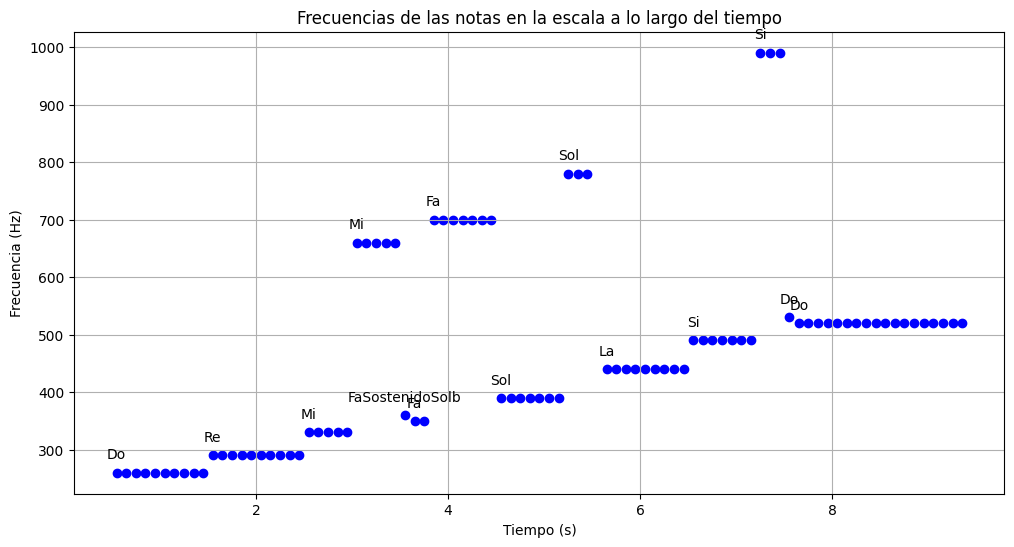

In [15]:
if notas_identificadas:
    scale_identifier.plot_scale_over_time(notas_identificadas, frecuencias_identificadas, time_stamps)
else:
    print("No se identificaron notas en el archivo de audio.")


## Cosas a mejorar
- presentación
- pentagrama

## Ejercicio 2:

Construir una pequeña aplicación que permita operar con diferentes filtros (con un selector) y trabajar con varios umbrales. (uno para los filtros pasa-bajo y pasa-alto y dos para los filtros pasa-banda y rechaza-banda). Demuestre su funcionalidad con señales ruidosas. Muestre en cada filtrado la señal original y filtrada en el dominio temporal y en el dominio de la frecuencia.